In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_selection import mutual_info_regression

from statistics import mean

sns.set_style('darkgrid')

In [2]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%202/data/dataset.csv', low_memory=False)

In [3]:
raw_df.head()

,image,newacct_no,line_stat,bill_cycl,serv_type,serv_code,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,term_reas_code,term_reas_desc,complaint_cnt,with_phone_service,churn,current_mth_churn,Unnamed: 19
0,201801,70068143.001.000000062,AC,1,BBS,VS100DUN,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,NaN,NaN,0,N,N,N,NaN
1,201801,70068143.003.000072630,AC,1,BBS,VS030F6R,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,NaN,NaN,0,N,N,N,NaN
2,201801,70071840.001.000000066,AC,1,BBS,EAXMXMFSRN1,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,NaN,NaN,0,Y,N,N,NaN
3,201801,70071840.003.000060034,AC,1,BBS,VS100DUN,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,NaN,NaN,0,Y,N,N,NaN
4,201801,70076500.001.000000073,AC,1,BBS,PF100FSR,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),NaN,NaN,0,N,Y,N,NaN


In [4]:
print(f'There are {raw_df.shape[0]} observations for {raw_df.shape[1]} predictors')

There are 510125 observations for 20 predictors


In [5]:
raw_df.isnull().sum()

image                      0
newacct_no                 0
line_stat                  0
bill_cycl                  0
serv_type                  0
serv_code                  0
tenure                     0
effc_strt_date          1937
effc_end_date           1937
contract_month          1937
ce_expiry               1937
secured_revenue            0
bandwidth                  0
term_reas_code        504602
term_reas_desc        504602
complaint_cnt              0
with_phone_service         0
churn                      0
current_mth_churn          0
Unnamed: 19           510123
dtype: int64

In [6]:
print(raw_df.bill_cycl.unique())
print(raw_df.serv_type.unique())
print(raw_df['Unnamed: 19'].unique())

[1]
['BBS']
[nan 'Y']


Since the three columns "bill_cycl", "serv_type" and "Unnamed: 19" don't bring any informations, I will delete them. The column "term_reas_desc" is redundant because it only describes the reason code, it can also be deleted.

In [7]:
raw_df = raw_df.drop(['bill_cycl', 'serv_type', 'serv_code', 'Unnamed: 19', 'term_reas_desc', 'line_stat'], axis = 1)

In [8]:
raw_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
image,510125.0,NaN,NaN,NaN,201857.993237,50.076142,201801.0,201807.0,201901.0,201907.0,201912.0
newacct_no,510125,27605,70068143.001.000000062,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,510125.0,NaN,NaN,NaN,60.700254,51.213282,0.0,18.0,45.0,95.0,225.0
effc_strt_date,508188,2085,01.08.2018 00:00:00,4185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effc_end_date,508188,2348,31.07.2020 00:00:00,4325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract_month,508188.0,NaN,NaN,NaN,24.916928,5.245176,0.0,24.0,24.0,24.0,120.0
ce_expiry,508188.0,NaN,NaN,NaN,7.390413,13.719428,-175.0,2.0,9.0,16.0,115.0
secured_revenue,510125.0,NaN,NaN,NaN,504.573587,1492.281865,-385.22,158.0,204.0,360.0,61161.29
bandwidth,510125,9,100M,256952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term_reas_code,5523,26,CUCO,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN


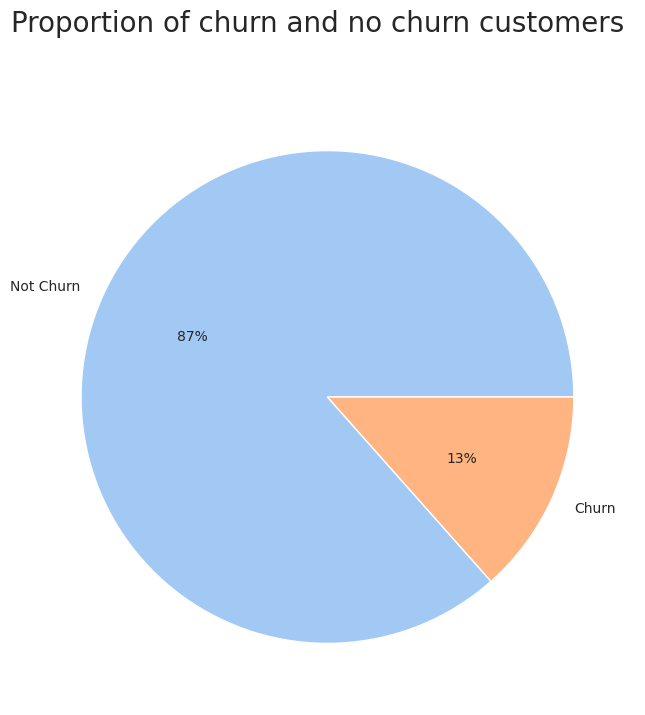

In [9]:
plt.figure(figsize = (8,8)).suptitle('Proportion of churn and no churn customers', fontsize = 20)
labels = ['Not Churn', 'Churn']

colors = sns.color_palette('pastel')[0:5]

plt.pie(raw_df.churn.value_counts().values, labels = labels, colors = colors, autopct = '%.0f%%')
plt.show()

**What are the main reasons that explains customer churn happens?**
It’s important to understand why customers leave in the first place. Let's study the main reasons customers churn.


Explanation of the different termination reason codes:

* REV: Relocate to non-coverage(w/prof)
* CLB: Closing Business
* NET: Network Problem
* UFSS: Unsatisfy Field Service Support
* CUCO: Downsizing / Cut cost
* EXP: Sales Plan Not Attractive
* NU: No Use
* OT: Overdue Termination: Involuntary termination
* COVL3: Coverage Issue: Low speed coverage
* COM15: COM-Unsatisfy Service quality
* COVL2: Coverage Issue: Low speed coverage
* OTHS: Others
* BILP: Billing Problem
* UCSH: Unsatisfy CS Hotline
* LOSF: Lack of Service Features
* EXI: Additional extra installation charge
* PLR: Parallel Run Order
* COVL1: Coverage Issue: Low speed coverage
* COM10: COM-Miss follow-Help Desk
* CUSN2: Customer Issue: No use
* UEMS: Unsatisfy Email Service
* CUSB0: Customer Issue: Bankruptcy
* MGR: Migration Order
* TRM: Termination
* NCAP: No capacity
* NWQU: Network quality

<Axes: xlabel='count', ylabel='term_reas_code'>

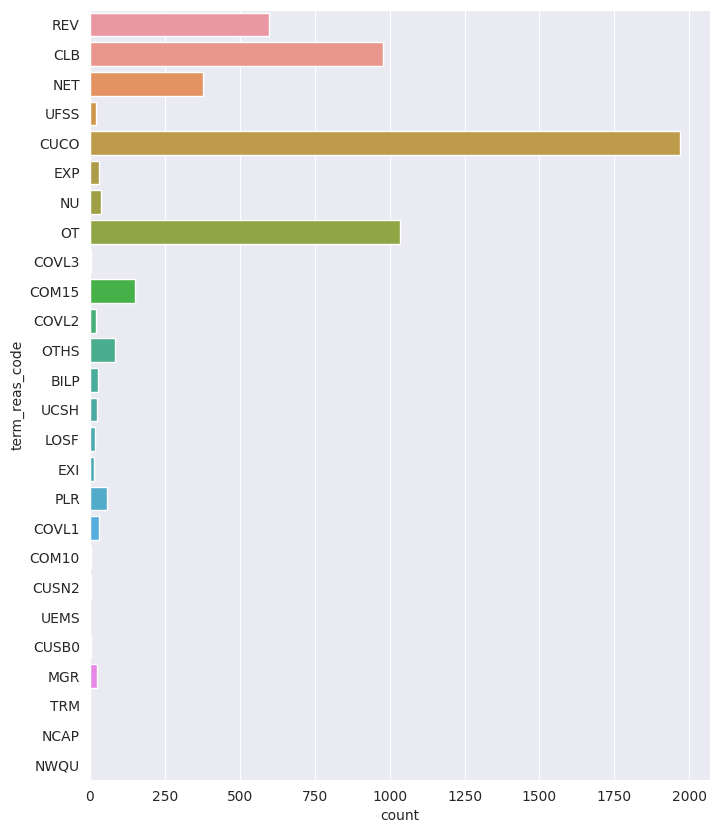

In [10]:
plt.figure(figsize = (8,10))
sns.countplot(y = raw_df.term_reas_code)

In [11]:
total_churn = len(raw_df.loc[raw_df.churn == 'Y'])
total_churn_with_reason = len(raw_df.loc[(raw_df.churn == 'Y') & (raw_df.term_reas_code.isnull() != False)])

percentage_reasons = total_churn_with_reason / total_churn

print(f'Only {round(percentage_reasons * 100)}% of the reasons are given in dataset. But it is enough to have a global view of the reasons that push customer to churn')

Only 92% of the reasons are given in dataset. But it is enough to have a global view of the reasons that push customer to churn


From that plot, we can see five main reasons that explains the churn: "Downsizing / Cut cost", "Overdue Termination: Involuntary termination", "Closing Business", "Relocate to non-coverage(w/prof)" and "Network Problem".

To prevent Data Leakage, this column will also be deleted since we won't have access to it when trying to predict churn. The column "current_mth_churn" won't be accessible either.

In [12]:
raw_df = raw_df.drop(['term_reas_code', 'current_mth_churn'], axis = 1)

#### How does the retention rate evolve in time?

To retrieve the time information, we can use the variable image that gives information on the billing date.

In [13]:
raw_df["year_billing"] = raw_df["image"].astype(str).str[:4].astype(int)
raw_df["month_billing"] = raw_df["image"].astype(str).str[4:].astype(int)
raw_df = raw_df.drop("image",axis=1)

Now we will study the retention rate. For that, I will follow the first customers and compare each month the percentage remaining.

In [14]:
first_customers = raw_df.loc[(raw_df.year_billing==2018)&(raw_df.month_billing==1)&(raw_df.churn=='N')]
first_customers = first_customers.newacct_no.unique()
nb_first_customers = len(first_customers)
df_first_customers = raw_df.loc[raw_df.newacct_no.isin(first_customers)]

In [15]:
churn_rate_evolution = [(str(month)+'-'+str(year), len(df_first_customers.loc[(df_first_customers.year_billing==year)&(df_first_customers.month_billing==month)&(df_first_customers.churn=='N')])/nb_first_customers*100) for year in range(2018,2020) for month in range(1,13)]
churn_rate_evolution = pd.DataFrame(churn_rate_evolution, columns =['Date', 'Retention'])
churn_rate_evolution["Date"] = pd.to_datetime(churn_rate_evolution["Date"])

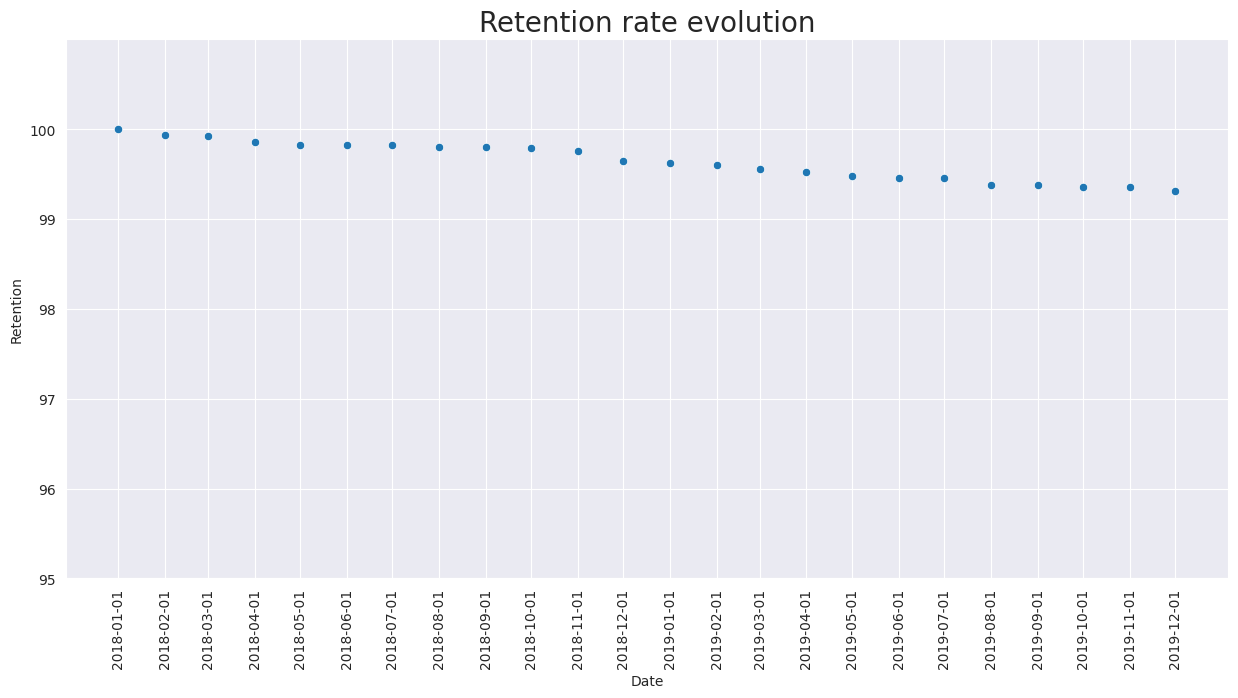

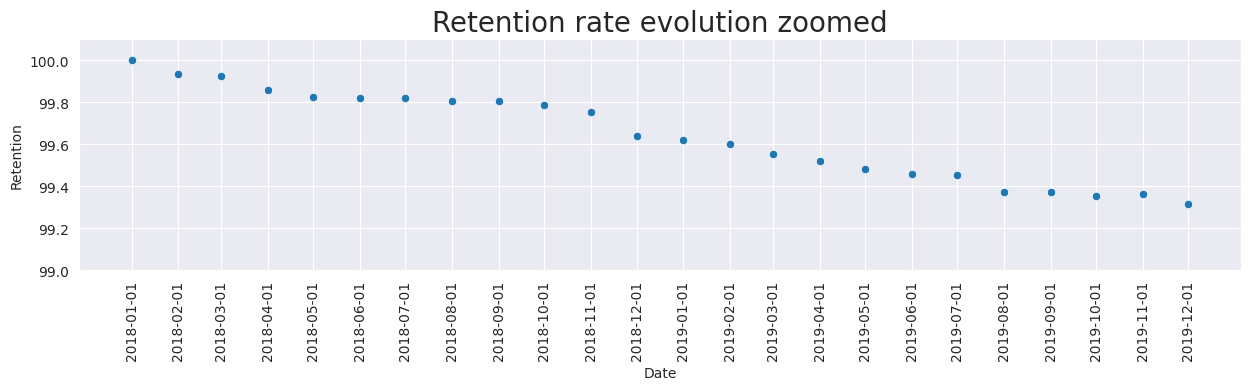

In [16]:
fig, axes = plt.subplots(figsize=(15,7))
sns.scatterplot(x="Date",y="Retention",data=churn_rate_evolution).set_title('Retention rate evolution', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.yticks([95,96,97,98,99,100])
plt.ylim(95,101)
fig, axes = plt.subplots(figsize=(15,3))
sns.scatterplot(x="Date",y="Retention",data=churn_rate_evolution).set_title('Retention rate evolution zoomed', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.ylim(99,100.1)
plt.show()

The retention rate seems to decrease quite slowly and lineary. In two years the company has only lost 0.7% of the first customers.

#### How much time does a custumer wait before churning?

We can visualize the repartition of tenure values for churn and non churn.

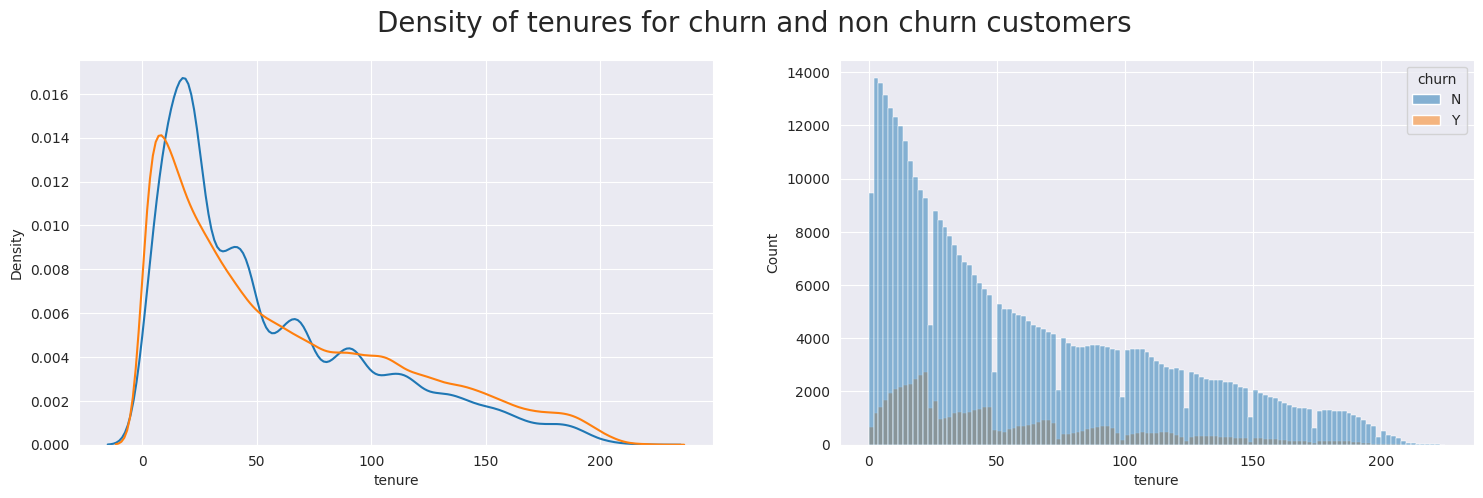

In [18]:
plt.figure(figsize = (18,5)).suptitle('Density of tenures for churn and non churn customers', fontsize=20)
plt.subplot(1,2,1)
sns.kdeplot(raw_df[raw_df.churn == 'Y'].tenure,label='Churn')
sns.kdeplot(raw_df[raw_df.churn == 'N'].tenure,label='Not Churn')
plt.subplot(1,2,2)
sns.histplot(x=raw_df.tenure,hue=raw_df.churn)
plt.show()

We can see here that the tenures repartion is quite similar for both churn and not, just with different volumes .

#### Does contracts influence churn?

In [19]:
freq_contracts = pd.DataFrame(raw_df.loc[raw_df.churn == 'Y'].contract_month.value_counts() / len(raw_df.loc[raw_df.churn == 'Y']))
freq_contracts.head(3)

,contract_month
24.0,0.848365
12.0,0.040992
36.0,0.029213


In [20]:
freq_contracts = pd.DataFrame(raw_df.loc[raw_df.churn == 'N'].contract_month.value_counts() / len(raw_df.loc[raw_df.churn == 'N']))
freq_contracts.head(3)

,contract_month
24.0,0.836066
36.0,0.051338
12.0,0.020583


Its clear that the most common contract is 24 months, but it seems that a longer contract like 36 months, may generate more churns than a smaller 12 months one.

#### How is the churn rate affected by the monthly revenue of customers?

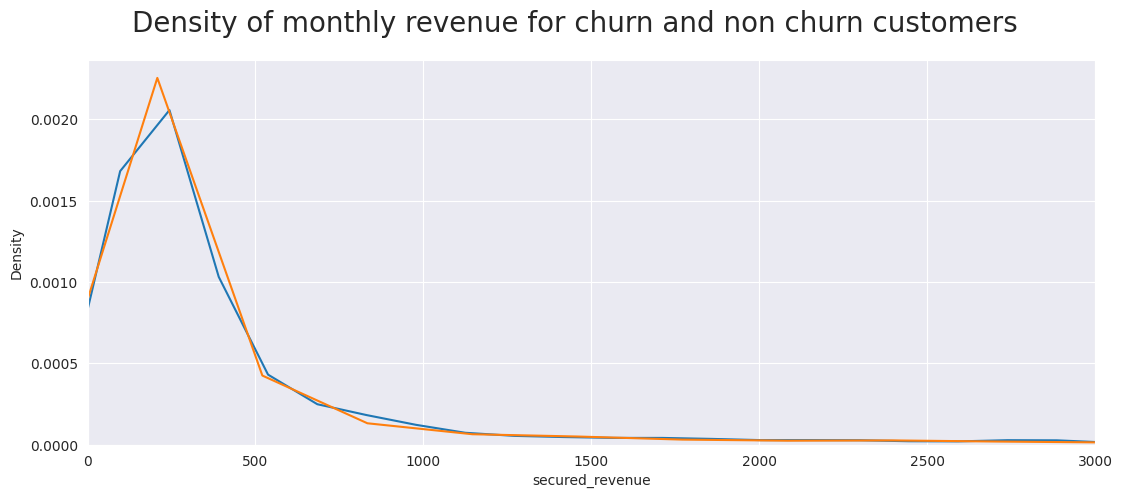

In [21]:
plt.figure(figsize = (13, 5)).suptitle('Density of monthly revenue for churn and non churn customers', fontsize = 20)

sns.kdeplot(raw_df[raw_df.churn == 'Y'].secured_revenue, label = "Churn")
sns.kdeplot(raw_df[raw_df.churn == 'N'].secured_revenue, label = "Not Churn")
plt.xlim(0, 3000)
plt.show()

We can see here that the revenue repartion is quite similar for both churn and not, just with different volumes

#### Does the bandwidth of a customer affect churn?

In [22]:
def bandwidth_encoder(bandwidth):
    if bandwidth in ('30M', '10M', 'BELOW 10M', '50M'):
        return 0
    if bandwidth in ('100M', '100M (FTTO)'):
        return 1
    if bandwidth in ('300M (FTTO)', '1000M (FTTO)', '500M (FTTO)'):
        return 2

raw_df['bandwidth'] = raw_df.bandwidth.map(bandwidth_encoder)
raw_df['bandwidth'] = raw_df.bandwidth.astype('int32')

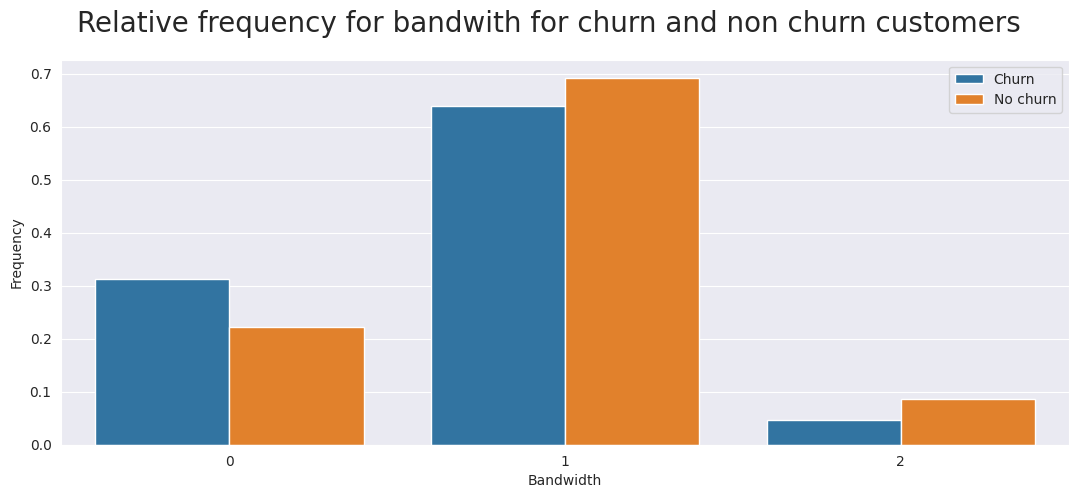

In [24]:
plt.figure(figsize = (13,5)).suptitle('Relative frequency for bandwith for churn and non churn customers', fontsize=20)

churn_bandwidth_freq = [len(raw_df[(raw_df.churn == 'Y')&(raw_df.bandwidth == 0)]),len(raw_df[(raw_df.churn == 'Y')&(raw_df.bandwidth == 1)]),len(raw_df[(raw_df.churn == 'Y')&(raw_df.bandwidth == 2)])]
churn_bandwidth_freq = [number / len(raw_df[raw_df.churn == 'Y']) for number in churn_bandwidth_freq]
no_churn_bandwidth_freq = [len(raw_df[(raw_df.churn == 'N')&(raw_df.bandwidth == 0)]),len(raw_df[(raw_df.churn == 'N')&(raw_df.bandwidth == 1)]),len(raw_df[(raw_df.churn == 'N')&(raw_df.bandwidth == 2)])]
no_churn_bandwidth_freq = [number / len(raw_df[raw_df.churn == 'N']) for number in no_churn_bandwidth_freq]


churn_bandwidth_freq = pd.DataFrame({"Frequency": churn_bandwidth_freq+no_churn_bandwidth_freq,
                    "Type": ['Churn','Churn','Churn','No churn','No churn','No churn'],
                  "Bandwidth": [0,1,2,0,1,2]})

s = sns.barplot(x ="Bandwidth", y = 'Frequency', data = churn_bandwidth_freq, hue = "Type")
plt.legend()
plt.show()

It seems that the better the bandwidth is the biggest is the difference bewteen customers who churn and don't. A better client bandwidth permits a better experience and keep that client.

#### What variables influence most the churn?

In [26]:
raw_df.with_phone_service = raw_df.with_phone_service.replace({
    "N":0,
    "0":0,
    "Y":1,
    }).astype(int)

In [28]:
raw_df.complaint_cnt = raw_df.complaint_cnt.replace({
    " customer/ user pass away":0,
    }).astype(int)

In [29]:
raw_df.churn = raw_df.churn.replace({
    "N":0,
    "Y":1,
    }).astype(int)

In [30]:
raw_df.effc_strt_date = pd.to_datetime(raw_df.effc_strt_date)
raw_df["start_month"] = raw_df.effc_strt_date.dt.month
raw_df["start_year"] = raw_df.effc_strt_date.dt.year

raw_df.effc_end_date = pd.to_datetime(raw_df.effc_strt_date)
raw_df["end_month"] = raw_df.effc_end_date.dt.month
raw_df["start_year"] = raw_df.effc_end_date.dt.year

raw_df = raw_df.drop(["effc_strt_date","effc_end_date"],axis=1)

<ipython-input-34-eb6319bccb68>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))
<ipython-input-34-eb6319bccb68>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')


<Axes: >

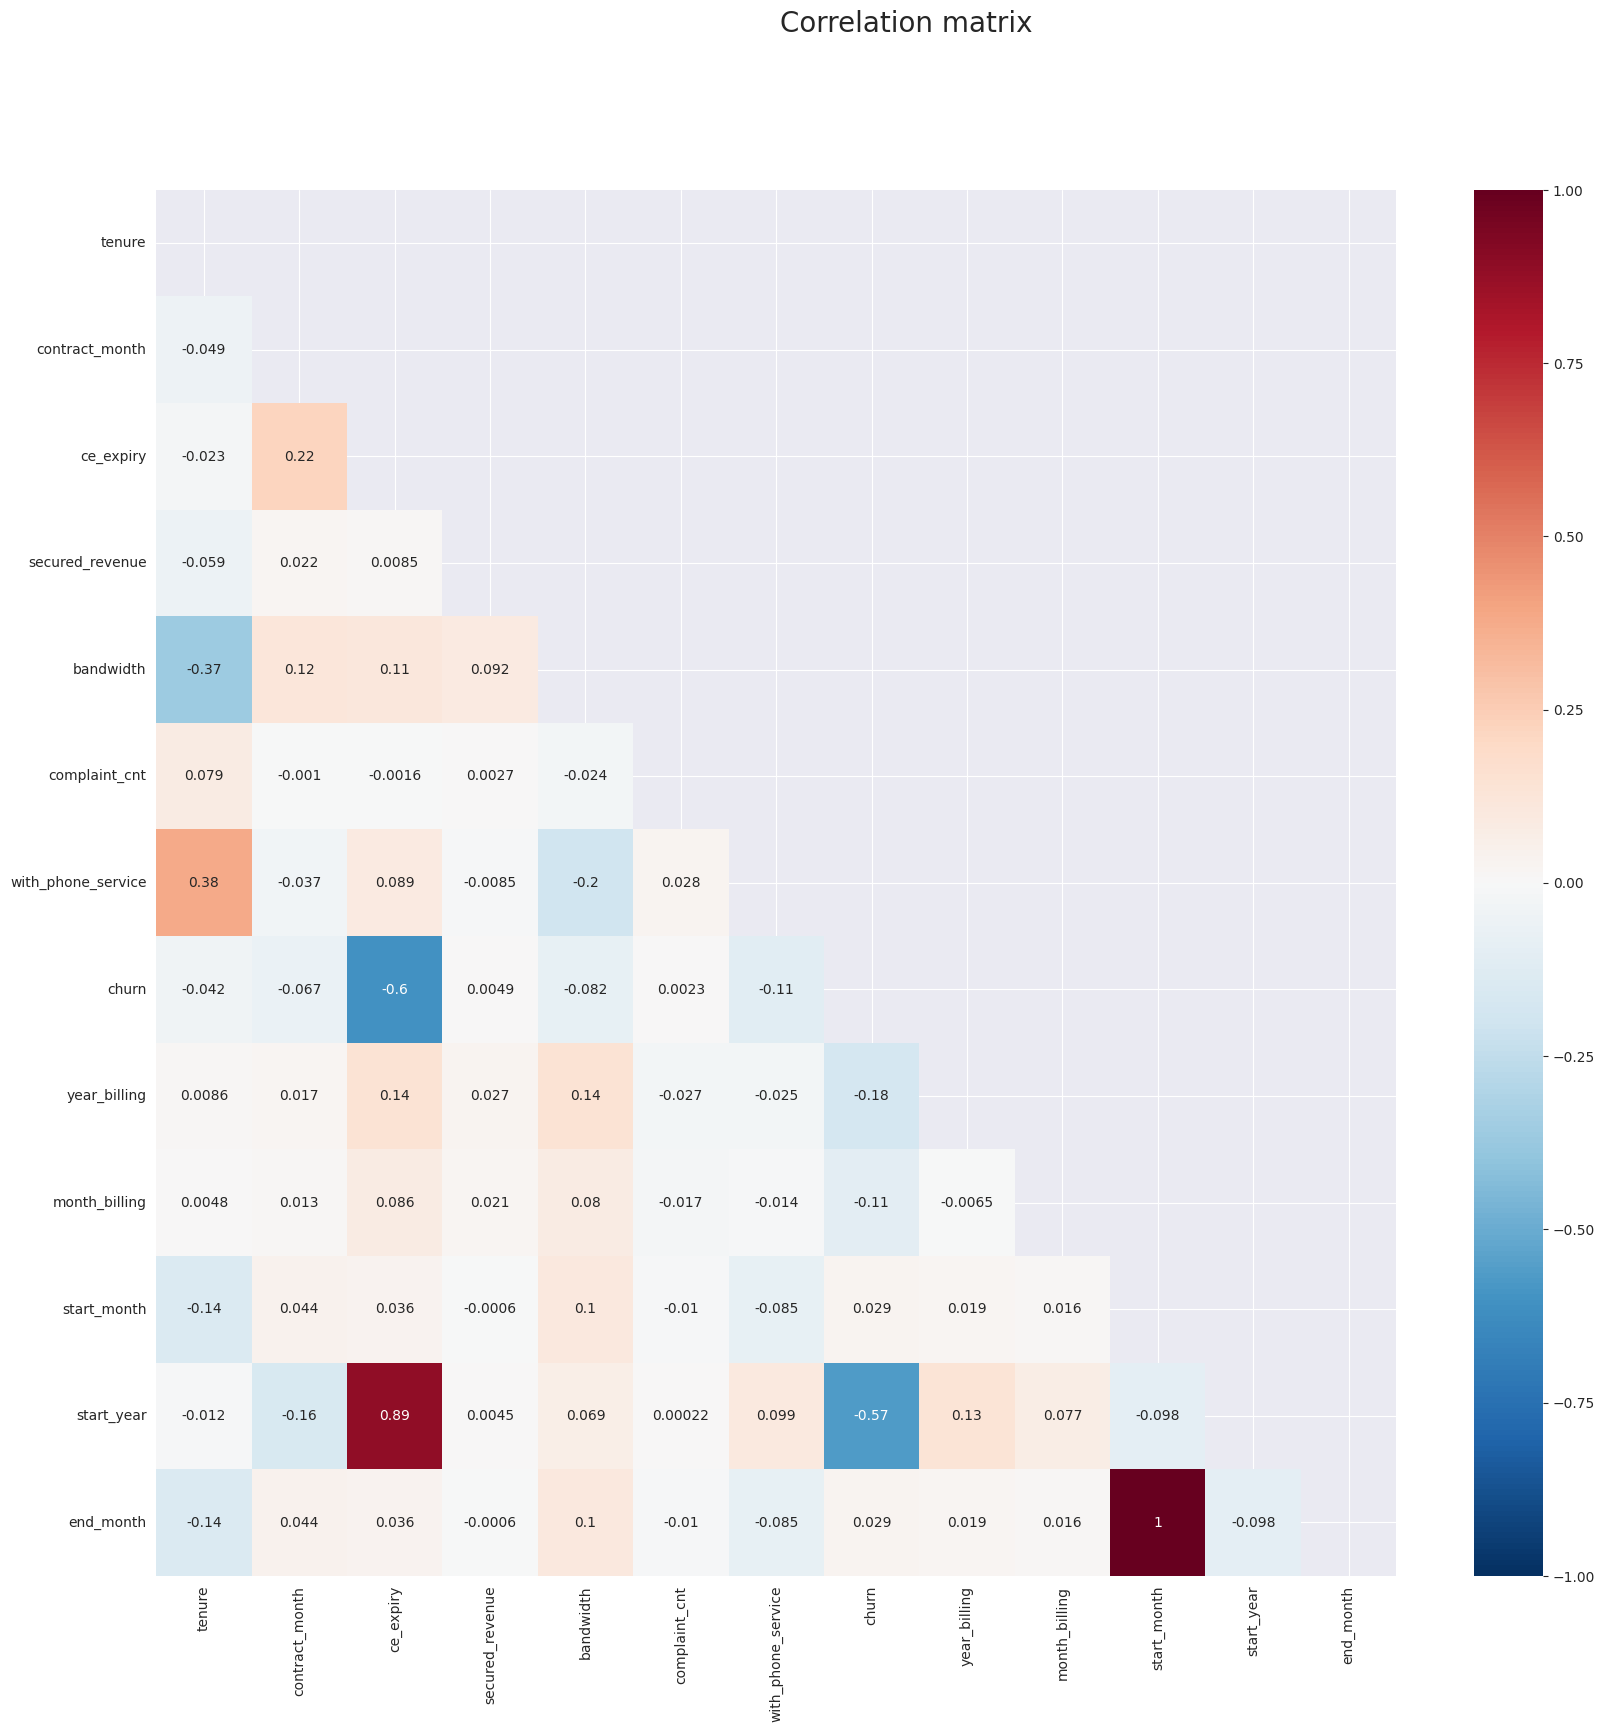

In [34]:
mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))

plt.figure(figsize = (20,18)).suptitle('Correlation matrix', fontsize=20)
sns.heatmap(raw_df.corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [35]:
def make_mi_scores(X, y):
    X = X.copy().fillna(0)
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [36]:
X = raw_df.copy()
y = X.pop("churn")

mi_scores = make_mi_scores(X, y)

In [37]:
print(mi_scores.sort_values(ascending=False))

newacct_no            0.502515
ce_expiry             0.339889
start_year            0.231511
secured_revenue       0.026757
year_billing          0.021112
with_phone_service    0.010912
bandwidth             0.006481
contract_month        0.006125
month_billing         0.005855
tenure                0.005678
complaint_cnt         0.005555
start_month           0.002013
end_month             0.001386
Name: MI Scores, dtype: float64


It looks like that the contract expiry date and the start year are the most linear linked to the churn of a customer.

In this part, I will try to find the best model to predict the churn of a customer with the given dataset. For that I will split the data with a training set that goes from January 2018 to November 2019 and try to predict if those customer could potentially churn during December 2019.

#### Load the Data

In [41]:
def preprocessing(X):
    def bandwidth_encoder(bandwidth):
        if bandwidth in ('30M', '10M','BELOW 10M', '50M'):
            return 0
        if bandwidth in ('100M','100M (FTTO)'):
            return 1
        if bandwidth in ('300M (FTTO)', '1000M (FTTO)', '500M (FTTO)'):
            return 2

    def clean(X_):
        X = X_.copy()
        X['bandwidth'] = X['bandwidth'].map(bandwidth_encoder)
        X['bandwidth'] = X['bandwidth'].astype('int32')
        X['with_phone_service'] = X['with_phone_service'].replace({
            "N": 0,
            "0": 0,
            "Y": 1,
        }).astype(int)
        X["complaint_cnt"] = X["complaint_cnt"].replace({" customer/ user pass away":0}).astype(int)
        X['year_billing'] = X['image'].astype(str).str[:4].astype(int)
        X['month_billing'] = X['image'].astype(str).str[4:].astype(int)
        X['effc_strt_date'] = pd.to_datetime(X['effc_strt_date'])
        X["start_month"] = X["effc_strt_date"].dt.month
        X["start_year"] = X["effc_strt_date"].dt.year

        X["effc_end_date"] = pd.to_datetime(X["effc_end_date"])
        X["end_month"] = X["effc_end_date"].dt.month
        X["start_year"] = X["effc_end_date"].dt.year

        X = X.drop(["effc_strt_date","effc_end_date","image","newacct_no","term_reas_code","current_mth_churn","bill_cycl","serv_type","serv_code","Unnamed: 19","term_reas_desc","line_stat"],axis=1)

        return X

    return clean(X)


In [42]:
def load_data():
    df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%202/data/dataset.csv",low_memory=False)

    df.churn = df.churn.replace({
        "N":0,
        "Y":1
    }).astype(int)

    X = df.copy()
    y = X.pop("churn")

    x_train = X.loc[X.image < 201912]
    y_train = y.loc[x_train.index]
    x_test = X.loc[X.image >= 201912]
    y_test = y.loc[x_test.index]

    x_train = x_train.dropna(subset = ['effc_strt_date'])
    y_train = y_train.loc[x_train.index]

    x_train = preprocessing(x_train)
    x_test = preprocessing(x_test)

    return x_train, x_test, y_train, y_test

In [43]:
x_train, x_test, y_train, y_test = load_data()

#### Define best model

In [47]:
from sklearn.tree import DecisionTreeClassifier
models = {}

models['Logistic Regression'] = {"model": LogisticRegression(random_state = 1, max_iter = 10000)}
models['Random Forest'] = {"model": RandomForestClassifier(random_state = 1)}
models['Gradient Boosting Classifier'] = {"model": GradientBoostingClassifier(random_state = 1)}
models['Ada Boost Classifier'] = {"model": AdaBoostClassifier(random_state = 1)}
models['Gaussian Naive Bayes'] = {"model": GaussianNB()}
models['Decision Tree Classifier'] = {"model": DecisionTreeClassifier(random_state = 1)}

To determine the best model, I want to use cross-validation for time series, moving the window of the studied period in time. That is called Blocked Cross-Validation.

However, since time is given per month, and that we want a full month to be the validation, I decided to create a function specially for cross validation with this dataset.

In [48]:
def cross_validate_dates(model,xtrain,ytrain,nb_splits = 5):
    list_months = []

    scores_accuracy = []
    scores_precision  = []
    scores_recall = []
    scores_f1 = []

    for year in xtrain.year_billing.unique():
        for month in xtrain.month_billing.unique():
            list_months.append((year,month))

    list_months.pop()
    size_split = len(list_months)-nb_splits

    xtrain_split = pd.DataFrame()
    for i in range(3):
        count=0
        for month in list_months[i:]:
            xtrain_split = pd.concat([xtrain_split,xtrain.loc[(xtrain.year_billing==month[0])&(xtrain.month_billing==month[1])]])
            count+=1
            if count>=size_split:
                ytrain_split = ytrain.loc[xtrain_split.index]
                xtest_split_month = list_months[size_split+i]
                xtest_split = xtrain.loc[(xtrain.year_billing==xtest_split_month[0])&(xtrain.month_billing==xtest_split_month[1])]
                ytest_split = ytrain.loc[xtest_split.index]
                break
        model.fit(xtrain_split,ytrain_split)
        ypred_split = model.predict(xtest_split)
        scores_accuracy.append(accuracy_score(ytest_split,ypred_split))
        scores_precision.append(precision_score(ytest_split,ypred_split))
        scores_recall.append(recall_score(ytest_split,ypred_split))
        scores_f1.append(f1_score(ytest_split,ypred_split))

    return {'test_accuracy':mean(scores_accuracy), 'test_precision':mean(scores_precision), 'test_recall':mean(scores_recall), 'test_f1':mean(scores_f1)}

In [49]:
def get_scores(models,xtrain,ytrain):
    scoring = ['precision', 'recall', 'f1', 'accuracy']
    #Performance evaluation
    def print_scores(name, scores):
        print("--- "+name+" ---")
        print("Accuracy: ",scores["test_accuracy"].mean())
        print("Precision: ",scores["test_precision"].mean())
        print("Recall: ",scores["test_recall"].mean())
        print("F1-Score: ",scores["test_f1"].mean())
        print("\n\n")

    for name,model in models.items():
        scores = cross_validate_dates(model["model"],xtrain,ytrain,nb_splits = 5)
        print_scores(name, scores)

The studied dataset has unequal proportions of churned and not churned customers. For that reason accuracy may not be a good metric to follow.

More generally, to target with marketing campains the potential churn customers, we want to make sure we don't miss those churns. But we also don't want to spam customers who did not intend to churn with useless marketing messages.

For both those reasons, the two metrics to take in consideration should be the precision and the recall. We can also study the F1 score to maintain a good balance between the precision and the recall.

In [51]:
get_scores(models,x_train,y_train)

--- Logistic Regression ---
Accuracy:  0.9462342531518115
Precision:  0.5666872633691681
Recall:  0.34172299008927765
F1-Score:  0.42626771848392614



--- Random Forest ---
Accuracy:  0.9982075922032884
Precision:  0.984276974474102
Recall:  0.9854591562064167
F1-Score:  0.9848673588240847



--- Gradient Boosting Classifier ---
Accuracy:  0.9849952843527499
Precision:  0.8068894911212997
Recall:  0.9769003272688336
F1-Score:  0.8836662537730913



--- Ada Boost Classifier ---
Accuracy:  0.9831881892463131
Precision:  0.797570406181272
Recall:  0.9546873007959269
F1-Score:  0.8688960738033565



--- Gaussian Naive Bayes ---
Accuracy:  0.951820138579343
Precision:  0.6326888938948529
Recall:  0.4443901977610707
F1-Score:  0.5217039705388216



--- Decision Tree Classifier ---
Accuracy:  0.9971140689534146
Precision:  0.9797310252559136
Recall:  0.9712727869639889
F1-Score:  0.9754737737042158





It seems that best results are given by the Random Forest Classifier for the 4 scores. For that reason, it will be that model we will use later on the test dataset.


#### Apply the model on the test dataset
Let's now compute the score for the test dataset.

In [52]:
def get_pipeline(model):
    imputer = SimpleImputer(strategy='most_frequent')
    scaler = MinMaxScaler()

    my_pipeline = Pipeline(steps=[('imputer', imputer),
                                  ('scaler',scaler),
                                  ('model', model)
                             ])

    return my_pipeline

In [53]:
pipeline = get_pipeline(RandomForestClassifier(random_state=1))
pipeline.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=1))])

And now the pipeline is ready for production and we can finally try it on our test dataset to see the final results.

Accuracy:  0.9978298218645447
Precision:  0.8608058608058609
Recall:  0.9591836734693877
F1 score:  0.9073359073359073


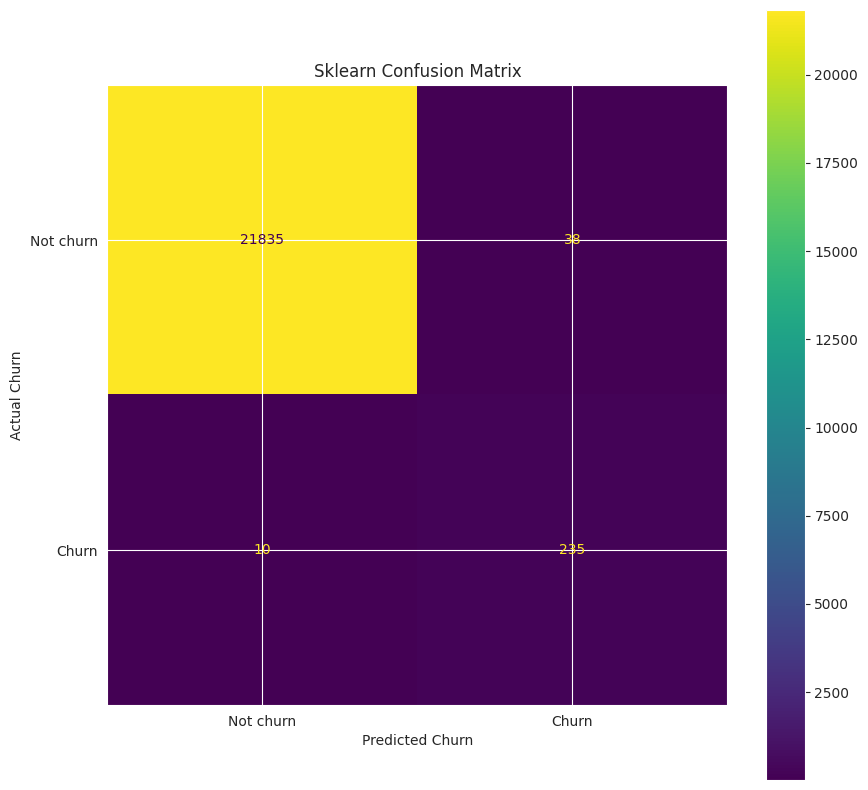

In [55]:
ypred = pipeline.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1 score: ",f1_score(y_test,ypred))

cm = confusion_matrix(y_test, ypred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Not churn', 'Churn'])

fig, ax = plt.subplots(figsize=(10,10))
cmd_obj.plot(ax=ax)

cmd_obj.ax_.set(title='Sklearn Confusion Matrix', xlabel='Predicted Churn', ylabel='Actual Churn')
plt.show()